In [46]:
import pandas as pd
import json
import joblib
import numpy as np
from azure.cosmos import CosmosClient
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [47]:
client = CosmosClient(url="https://delta.documents.azure.com:443/", credential="ogZtTqNUKrGr9jA89Fr2iTaveJzbMYJl8zpaq0bmx0ivFryPsOvl4zBJcXVD8CH91NeA4CPnSjRnACDbiZBJAw==")

In [48]:
database = client.get_database_client("StockTradingGame")

container = database.get_container_client("MarketData")

stocks_history_raw = list(container.read_all_items())

In [49]:
json_string = json.dumps(stocks_history_raw)

df_raw = pd.read_json(json_string)
# df_raw

In [50]:

df={}

df_raw["date"] = pd.to_datetime(df_raw["date"])


starting_date = pd.to_datetime("2011-01-18")

filtered_df = df_raw[df_raw["date"] >= starting_date]

df = filtered_df.pivot(index="date", columns="symbol", values="price")

df = df.reset_index()

# print(pivot_df)
# for companies in StockCompanies:
#     data = df_raw[df_raw['symbol'] == companies]
    # data
    # df["symbol"]=data["symbol"]


df= pd.DataFrame(df)
# df.set_index('date', inplace=True)

df

symbol,date,AAPL,AMZN,GOOG,MSFT,TSLA
0,2011-01-18,11.972589,9.497000,15.771821,28.425000,1.691833
1,2011-01-19,12.255982,9.437250,15.856129,28.470000,1.642000
2,2011-01-20,11.942232,9.188750,15.668458,28.382500,1.557833
3,2011-01-21,11.803571,9.006375,15.594672,28.217500,1.541000
4,2011-01-24,11.861518,8.843000,15.145543,28.237499,1.601000
...,...,...,...,...,...,...
3139,2023-07-11,188.285004,128.412500,117.131250,330.847496,268.927498
3140,2023-07-12,189.904999,130.300000,119.720001,337.780006,274.074989
3141,2023-07-13,190.502499,133.930000,123.191250,341.244995,275.635002
3142,2023-07-14,190.432499,134.862496,125.704998,347.142494,280.000000


In [51]:
# StockCompanies = "MSFT"

# df={}


# data = df_raw[df_raw['symbol'] == "MSFT"]
# # data
# # df["symbol"]=data["symbol"]
# df["date"]=data["date"]
# df["price"]=data["price"]
# df= pd.DataFrame(df)
# # df.set_index('date', inplace=True)

# df

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['date'] = pd.to_datetime(df['date']).astype(np.int64)
X = df.drop('date',axis=1)
# X = df['date']
y= df[['MSFT','AAPL','GOOG','AMZN','TSLA']]
# X_scaled = scaler.fit_transform(X)
df
# X = data.drop('date', axis=1)
# y = data['price']


symbol,date,AAPL,AMZN,GOOG,MSFT,TSLA
0,1295308800000000000,11.972589,9.497000,15.771821,28.425000,1.691833
1,1295395200000000000,12.255982,9.437250,15.856129,28.470000,1.642000
2,1295481600000000000,11.942232,9.188750,15.668458,28.382500,1.557833
3,1295568000000000000,11.803571,9.006375,15.594672,28.217500,1.541000
4,1295827200000000000,11.861518,8.843000,15.145543,28.237499,1.601000
...,...,...,...,...,...,...
3139,1689033600000000000,188.285004,128.412500,117.131250,330.847496,268.927498
3140,1689120000000000000,189.904999,130.300000,119.720001,337.780006,274.074989
3141,1689206400000000000,190.502499,133.930000,123.191250,341.244995,275.635002
3142,1689292800000000000,190.432499,134.862496,125.704998,347.142494,280.000000


In [53]:
X

symbol,AAPL,AMZN,GOOG,MSFT,TSLA
0,11.972589,9.497000,15.771821,28.425000,1.691833
1,12.255982,9.437250,15.856129,28.470000,1.642000
2,11.942232,9.188750,15.668458,28.382500,1.557833
3,11.803571,9.006375,15.594672,28.217500,1.541000
4,11.861518,8.843000,15.145543,28.237499,1.601000
...,...,...,...,...,...
3139,188.285004,128.412500,117.131250,330.847496,268.927498
3140,189.904999,130.300000,119.720001,337.780006,274.074989
3141,190.502499,133.930000,123.191250,341.244995,275.635002
3142,190.432499,134.862496,125.704998,347.142494,280.000000


In [54]:
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# encoder = OneHotEncoder()

# # Fit and transform the encoder on your categorical data
# encoded_symbols = encoder.fit_transform(X_train[['symbol']])


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train

symbol,AAPL,AMZN,GOOG,MSFT,TSLA
0,11.972589,9.497000,15.771821,28.425000,1.691833
1,12.255982,9.437250,15.856129,28.470000,1.642000
2,11.942232,9.188750,15.668458,28.382500,1.557833
3,11.803571,9.006375,15.594672,28.217500,1.541000
4,11.861518,8.843000,15.145543,28.237499,1.601000
...,...,...,...,...,...
3076,161.389999,101.224998,106.977499,288.227501,181.415001
3077,161.505001,100.182501,106.385000,284.050003,187.079998
3078,160.790001,99.112501,106.291750,284.312500,185.792499
3079,163.602501,100.657500,107.341251,286.625000,184.075001


In [57]:
y_train

symbol,MSFT,AAPL,GOOG,AMZN,TSLA
0,28.425000,11.972589,15.771821,9.497000,1.691833
1,28.470000,12.255982,15.856129,9.437250,1.642000
2,28.382500,11.942232,15.668458,9.188750,1.557833
3,28.217500,11.803571,15.594672,9.006375,1.541000
4,28.237499,11.861518,15.145543,8.843000,1.601000
...,...,...,...,...,...
3076,288.227501,161.389999,106.977499,101.224998,181.415001
3077,284.050003,161.505001,106.385000,100.182501,187.079998
3078,284.312500,160.790001,106.291750,99.112501,185.792499
3079,286.625000,163.602501,107.341251,100.657500,184.075001


In [58]:
X_test

symbol,AAPL,AMZN,GOOG,MSFT,TSLA
3081,164.934998,102.805000,105.969999,289.122498,186.435001
3082,166.407501,102.992498,105.987501,289.677505,185.682499
3083,166.782501,103.097502,104.689999,287.007500,180.209999
3084,166.542496,103.949999,105.519501,286.367493,164.855000
3085,165.252502,106.572500,106.031250,285.025002,164.300003
...,...,...,...,...,...
3139,188.285004,128.412500,117.131250,330.847496,268.927498
3140,189.904999,130.300000,119.720001,337.780006,274.074989
3141,190.502499,133.930000,123.191250,341.244995,275.635002
3142,190.432499,134.862496,125.704998,347.142494,280.000000


In [59]:
y_test

symbol,MSFT,AAPL,GOOG,AMZN,TSLA
3081,289.122498,164.934998,105.969999,102.805000,186.435001
3082,289.677505,166.407501,105.987501,102.992498,185.682499
3083,287.007500,166.782501,104.689999,103.097502,180.209999
3084,286.367493,166.542496,105.519501,103.949999,164.855000
3085,285.025002,165.252502,106.031250,106.572500,164.300003
...,...,...,...,...,...
3139,330.847496,188.285004,117.131250,128.412500,268.927498
3140,337.780006,189.904999,119.720001,130.300000,274.074989
3141,341.244995,190.502499,123.191250,133.930000,275.635002
3142,347.142494,190.432499,125.704998,134.862496,280.000000


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data and target
model = RandomForestRegressor()
model.fit(X_train, y_train)

features = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
X_batch = df[features].values

# Make batch predictions
y_batch_pred = model.predict(X_batch)


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [61]:
# model = LogisticRegression()
# model.fit(X_train_scaled, y_train)

In [62]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [63]:
y_pred

array([[285.85375168, 162.98810109, 106.14883948, 101.40590028,
        186.69990011],
       [286.07257691, 163.15157622, 106.26700197, 101.47005005,
        186.53442551],
       [286.14897789, 163.59072627, 105.81441177, 101.8882248 ,
        188.16320143],
       [263.3876255 , 150.16415181,  99.9447349 ,  96.95827494,
        167.35117465],
       [262.36045038, 149.58395178,  99.80454498,  96.70957504,
        166.55462452],
       [261.80517535, 149.20455172,  99.68512004,  96.58690001,
        166.09979942],
       [260.45224985, 148.22610158,  98.87213244,  96.20917501,
        165.69507479],
       [254.69682459, 144.9657262 ,  97.4968125 ,  94.75094973,
        159.13904969],
       [254.49367449, 144.78237606,  97.50295748,  94.63819969,
        158.74454964],
       [261.80152466, 149.05275158,  99.65742994,  96.50107462,
        165.04359998],
       [261.80152466, 149.05275158,  99.65742994,  96.50107462,
        165.04359998],
       [261.56157487, 148.91337658,  99.556

In [64]:
y_test

symbol,MSFT,AAPL,GOOG,AMZN,TSLA
3081,289.122498,164.934998,105.969999,102.805000,186.435001
3082,289.677505,166.407501,105.987501,102.992498,185.682499
3083,287.007500,166.782501,104.689999,103.097502,180.209999
3084,286.367493,166.542496,105.519501,103.949999,164.855000
3085,285.025002,165.252502,106.031250,106.572500,164.300003
...,...,...,...,...,...
3139,330.847496,188.285004,117.131250,128.412500,268.927498
3140,337.780006,189.904999,119.720001,130.300000,274.074989
3141,341.244995,190.502499,123.191250,133.930000,275.635002
3142,347.142494,190.432499,125.704998,134.862496,280.000000


In [65]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)


In [66]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


In [67]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [68]:
from sklearn.metrics import explained_variance_score

y_pred = model.predict(X_test)
evs = explained_variance_score(y_test, y_pred)


In [69]:
# predictions = model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy:.2f}")
# print(classification_report(y_test, predictions))

In [70]:
y_pred = model.predict(X_test)

In [71]:
y_pred = y_pred.reshape(63, 5)

In [72]:
y_pred

array([[285.85375168, 162.98810109, 106.14883948, 101.40590028,
        186.69990011],
       [286.07257691, 163.15157622, 106.26700197, 101.47005005,
        186.53442551],
       [286.14897789, 163.59072627, 105.81441177, 101.8882248 ,
        188.16320143],
       [263.3876255 , 150.16415181,  99.9447349 ,  96.95827494,
        167.35117465],
       [262.36045038, 149.58395178,  99.80454498,  96.70957504,
        166.55462452],
       [261.80517535, 149.20455172,  99.68512004,  96.58690001,
        166.09979942],
       [260.45224985, 148.22610158,  98.87213244,  96.20917501,
        165.69507479],
       [254.69682459, 144.9657262 ,  97.4968125 ,  94.75094973,
        159.13904969],
       [254.49367449, 144.78237606,  97.50295748,  94.63819969,
        158.74454964],
       [261.80152466, 149.05275158,  99.65742994,  96.50107462,
        165.04359998],
       [261.80152466, 149.05275158,  99.65742994,  96.50107462,
        165.04359998],
       [261.56157487, 148.91337658,  99.556

In [73]:
y_test

symbol,MSFT,AAPL,GOOG,AMZN,TSLA
3081,289.122498,164.934998,105.969999,102.805000,186.435001
3082,289.677505,166.407501,105.987501,102.992498,185.682499
3083,287.007500,166.782501,104.689999,103.097502,180.209999
3084,286.367493,166.542496,105.519501,103.949999,164.855000
3085,285.025002,165.252502,106.031250,106.572500,164.300003
...,...,...,...,...,...
3139,330.847496,188.285004,117.131250,128.412500,268.927498
3140,337.780006,189.904999,119.720001,130.300000,274.074989
3141,341.244995,190.502499,123.191250,133.930000,275.635002
3142,347.142494,190.432499,125.704998,134.862496,280.000000


In [74]:
errors = y_pred - y_test

In [75]:
print("Errors:", errors)

Errors: symbol       MSFT       AAPL      GOOG       AMZN       TSLA
3081    -3.268746  -1.946896  0.178840  -1.399100   0.264899
3082    -3.604929  -3.255925  0.279501  -1.522448   0.851927
3083    -0.858522  -3.191775  1.124413  -1.209277   7.953202
3084   -22.979867 -16.378344 -5.574766  -6.991724   2.496175
3085   -22.664551 -15.668550 -6.226705  -9.862925   2.254622
...           ...        ...       ...        ...        ...
3139   -46.931996 -28.558329  8.592002  12.018142   5.366417
3140   -50.595656 -25.334397  3.881776   9.200476  11.804819
3141   -51.177818 -24.687072  2.143020   6.632093  10.916765
3142   -55.635043 -25.458222  1.064777   6.545397   6.947600
3143   -53.993102 -27.757725  0.164744   7.561229   3.389360

[63 rows x 5 columns]


In [76]:
# predictions_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# print(predictions_table)

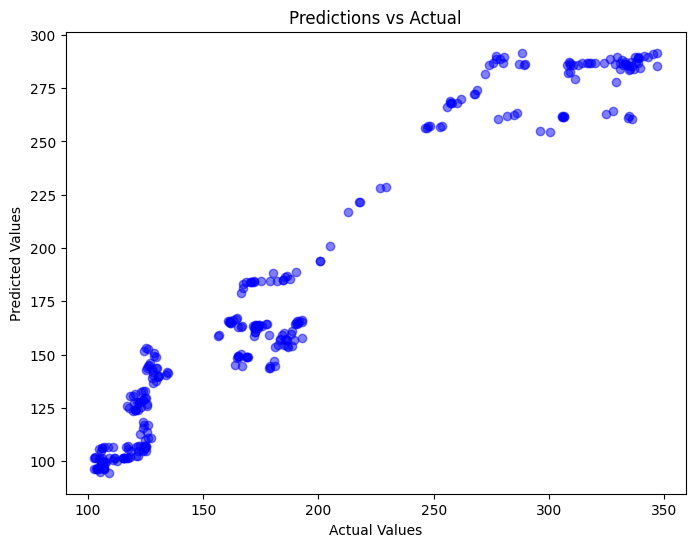

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')
plt.show()

In [78]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 563.7168082778327


In [79]:
stock_symbols = ["MSFT", "AAPL", "GOOG", "AMZN", "TSLA"]


predicted_prices = dict(zip(stock_symbols, y_pred[0]))

current_prices = (y_train.iloc[-1]).to_dict()

predicted_prices
# y_pred


{'MSFT': 285.85375168249993,
 'AAPL': 162.9881010924999,
 'GOOG': 106.14883947750006,
 'AMZN': 101.40590027749998,
 'TSLA': 186.69990010999993}

In [80]:
current_prices 

{'MSFT': 286.32750699999997,
 'AAPL': 164.98500425,
 'GOOG': 108.57999975,
 'AMZN': 102.2225,
 'TSLA': 184.30999775}

In [81]:
def make_decisions(predictions, current_prices, balance):
    decisions = {}

    expected_changes = {
        stock: predicted - current_prices[stock] 
        for stock, predicted in predictions.items()
    }

    sorted_stocks = sorted(
        expected_changes.keys(), 
        key=lambda stock: expected_changes[stock], 
        reverse=True
    )

    for stock in sorted_stocks:
        predicted_price = predictions[stock]
        current_price = current_prices[stock]

        if predicted_price > current_price and balance > current_price:
            decisions[stock] = "Buy"
            balance -= current_price
        elif predicted_price < current_price:
            decisions[stock] = "Sell"
            balance += current_price
        else:
            decisions[stock] = "Hold"

    return decisions

stock_symbols = ["MSFT", "AAPL", "GOOG", "AMZN", "TSLA"]


predicted_prices = dict(zip(stock_symbols, y_pred[0]))

current_prices = (y_train.iloc[-1]).to_dict()

balance = 10000.0

decisions = make_decisions(predicted_prices, current_prices, balance)
for stock, decision in decisions.items():
    print(f"Decision for {stock}: {decision}")

# print(f"Final balance: {balance}")
decisions

Decision for TSLA: Buy
Decision for MSFT: Sell
Decision for AMZN: Sell
Decision for AAPL: Sell
Decision for GOOG: Sell


{'TSLA': 'Buy', 'MSFT': 'Sell', 'AMZN': 'Sell', 'AAPL': 'Sell', 'GOOG': 'Sell'}

In [82]:
y_train.iloc[-1]

symbol
MSFT    286.327507
AAPL    164.985004
GOOG    108.580000
AMZN    102.222500
TSLA    184.309998
Name: 3080, dtype: float64

In [83]:
predicted_prices 

{'MSFT': 285.85375168249993,
 'AAPL': 162.9881010924999,
 'GOOG': 106.14883947750006,
 'AMZN': 101.40590027749998,
 'TSLA': 186.69990010999993}

In [84]:
current_prices

{'MSFT': 286.32750699999997,
 'AAPL': 164.98500425,
 'GOOG': 108.57999975,
 'AMZN': 102.2225,
 'TSLA': 184.30999775}

In [85]:
# def make_decisions_with_positive_changes(predictions, current_prices, balance):
#     decisions = {}
#     price_changes = {}

#     expected_changes = {
#         stock: predicted - current_prices[stock] 
#         for stock, predicted in predictions.items()
#     }

#     sorted_stocks = sorted(
#         expected_changes.keys(), 
#         key=lambda stock: expected_changes[stock], 
#         reverse=True
#     )

#     for stock in sorted_stocks:
#         predicted_price = predictions[stock]
#         current_price = current_prices[stock]

#         if predicted_price > current_price and balance > current_price:
#             decisions[stock] = "Buy"
#             balance -= current_price
#         elif predicted_price < current_price:
#             decisions[stock] = "Sell"
#             balance += current_price
#         else:
#             decisions[stock] = "Hold"

#         price_changes[stock] = abs(predicted_price - current_price)

#     return decisions, price_changes


# stock_symbols = ["MSFT", "AAPL", "GOOG", "AMZN", "TSLA"]


# predicted_prices = dict(zip(stock_symbols, y_pred[0]))

# current_prices = (y_train.iloc[-1]).to_dict()
# balance = 10000.0

# decisions, price_changes = make_decisions_with_changes(predicted_prices, current_prices, balance)
# for stock, decision in decisions.items():
#     print(f"Decision for {stock}: {decision}, Price Change: {price_changes[stock]}") 

In [86]:
# Save the trained model
import joblib
#model_filename = './BOT_Model.joblib'

# with open('BOT_Model.pkl', 'wb') as f:
joblib.dump(model, "BOT_Model.joblib")

# joblib.dump(model, model_filename)

#loaded_model = joblib.load("BOT_Model.joblib")

['BOT_Model.joblib']

In [87]:
X

symbol,AAPL,AMZN,GOOG,MSFT,TSLA
0,11.972589,9.497000,15.771821,28.425000,1.691833
1,12.255982,9.437250,15.856129,28.470000,1.642000
2,11.942232,9.188750,15.668458,28.382500,1.557833
3,11.803571,9.006375,15.594672,28.217500,1.541000
4,11.861518,8.843000,15.145543,28.237499,1.601000
...,...,...,...,...,...
3139,188.285004,128.412500,117.131250,330.847496,268.927498
3140,189.904999,130.300000,119.720001,337.780006,274.074989
3141,190.502499,133.930000,123.191250,341.244995,275.635002
3142,190.432499,134.862496,125.704998,347.142494,280.000000


In [88]:
# from test import loadModel 

# loadModel(X)

In [89]:
X_test
# loaded_model.predict(X_test)

symbol,AAPL,AMZN,GOOG,MSFT,TSLA
3081,164.934998,102.805000,105.969999,289.122498,186.435001
3082,166.407501,102.992498,105.987501,289.677505,185.682499
3083,166.782501,103.097502,104.689999,287.007500,180.209999
3084,166.542496,103.949999,105.519501,286.367493,164.855000
3085,165.252502,106.572500,106.031250,285.025002,164.300003
...,...,...,...,...,...
3139,188.285004,128.412500,117.131250,330.847496,268.927498
3140,189.904999,130.300000,119.720001,337.780006,274.074989
3141,190.502499,133.930000,123.191250,341.244995,275.635002
3142,190.432499,134.862496,125.704998,347.142494,280.000000


In [90]:
current_prices_array = np.array([343.36244564, 190.83887423, 123.8258488, 133.39324854, 278.66027579])


stock_symbols = ["MSFT", "AAPL", "GOOGL", "AMZN", "TSLA"]

# symbols, handling NaN values
current_prices_dict = {}
for stock, price in zip(stock_symbols, current_prices_array):
    if not np.isnan(price):
        current_prices_dict[stock] = price

print("Transformed dictionary:")
print(current_prices_dict)

Transformed dictionary:
{'MSFT': 343.36244564, 'AAPL': 190.83887423, 'GOOGL': 123.8258488, 'AMZN': 133.39324854, 'TSLA': 278.66027579}
